In [ ]:
# Install the library
%pip install pythae

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import torchvision.datasets as datasets

device = "cuda" if torch.cuda.is_available() else "cpu"

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
mnist_trainset = datasets.MNIST(root='../../data', train=True, download=True, transform=None)

train_dataset = mnist_trainset.data[:-10000].reshape(-1, 1, 28, 28) / 255.
eval_dataset = mnist_trainset.data[-10000:].reshape(-1, 1, 28, 28) / 255.

In [ ]:
from pythae.models import VAEGAN, VAEGANConfig
from pythae.trainers import CoupledOptimizerAdversarialTrainerConfig
from pythae.pipelines.training import TrainingPipeline
from pythae.models.nn.benchmarks.mnist import Encoder_ResNet_VAE_MNIST, Decoder_ResNet_AE_MNIST, Discriminator_Conv_MNIST

In [ ]:
config = CoupledOptimizerAdversarialTrainerConfig(
    output_dir='my_model',
    learning_rate=1e-4,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_epochs=5, # Change this to train the model a bit more
)


model_config = VAEGANConfig(
    input_dim=(1, 28, 28),
    latent_dim=16,
    adversarial_loss_scale=0.8,
    reconstruction_layer= 3,
    margin=0.4,
    equilibrium= 0.68

)

model = VAEGAN(
    model_config=model_config,
    encoder=Encoder_ResNet_VAE_MNIST(model_config), 
    decoder=Decoder_ResNet_AE_MNIST(model_config),
    discriminator=Discriminator_Conv_MNIST(model_config)
)

In [ ]:
pipeline = TrainingPipeline(
    training_config=config,
    model=model
)

In [ ]:
pipeline(
    train_data=train_dataset,
    eval_data=eval_dataset
)

Preprocessing train data...
INFO:pythae.pipelines.training:Preprocessing train data...
Checking train dataset...
INFO:pythae.pipelines.training:Checking train dataset...
Preprocessing eval data...

INFO:pythae.pipelines.training:Preprocessing eval data...

Checking eval dataset...
INFO:pythae.pipelines.training:Checking eval dataset...
Using Coupled Optimizer Adversarial Trainer

INFO:pythae.pipelines.training:Using Coupled Optimizer Adversarial Trainer

Model passed sanity check !
Ready for training.

INFO:pythae.trainers.base_trainer.base_trainer:Model passed sanity check !
Ready for training.

Created my_model/VAEGAN_training_2023-05-02_10-29-02. 
Training config, checkpoints and final model will be saved here.

INFO:pythae.trainers.base_trainer.base_trainer:Created my_model/VAEGAN_training_2023-05-02_10-29-02. 
Training config, checkpoints and final model will be saved here.

Training params:
 - max_epochs: 5
 - per_device_train_batch_size: 64
 - per_device_eval_batch_size: 64
 - c

Training of epoch 1/5:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 1/5:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.coupled_optimizer_adversarial_trainer.coupled_optimizer_adversarial_trainer:--------------------------------------------------------------------------
Train loss: 37.5209
INFO:pythae.trainers.coupled_optimizer_adversarial_trainer.coupled_optimizer_adversarial_trainer:Train loss: 37.5209
Eval loss: 45.8551
INFO:pythae.trainers.coupled_optimizer_adversarial_trainer.coupled_optimizer_adversarial_trainer:Eval loss: 45.8551
--------------------------------------------------------------------------
INFO:pythae.trainers.coupled_optimizer_adversarial_trainer.coupled_optimizer_adversarial_trainer:--------------------------------------------------------------------------


Training of epoch 2/5:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 2/5:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.coupled_optimizer_adversarial_trainer.coupled_optimizer_adversarial_trainer:--------------------------------------------------------------------------
Train loss: 38.0561
INFO:pythae.trainers.coupled_optimizer_adversarial_trainer.coupled_optimizer_adversarial_trainer:Train loss: 38.0561
Eval loss: 41.7119
INFO:pythae.trainers.coupled_optimizer_adversarial_trainer.coupled_optimizer_adversarial_trainer:Eval loss: 41.7119
--------------------------------------------------------------------------
INFO:pythae.trainers.coupled_optimizer_adversarial_trainer.coupled_optimizer_adversarial_trainer:--------------------------------------------------------------------------


Training of epoch 3/5:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 3/5:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.coupled_optimizer_adversarial_trainer.coupled_optimizer_adversarial_trainer:--------------------------------------------------------------------------
Train loss: 38.193
INFO:pythae.trainers.coupled_optimizer_adversarial_trainer.coupled_optimizer_adversarial_trainer:Train loss: 38.193
Eval loss: 34.7706
INFO:pythae.trainers.coupled_optimizer_adversarial_trainer.coupled_optimizer_adversarial_trainer:Eval loss: 34.7706
--------------------------------------------------------------------------
INFO:pythae.trainers.coupled_optimizer_adversarial_trainer.coupled_optimizer_adversarial_trainer:--------------------------------------------------------------------------


Training of epoch 4/5:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 4/5:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.coupled_optimizer_adversarial_trainer.coupled_optimizer_adversarial_trainer:--------------------------------------------------------------------------
Train loss: 34.8486
INFO:pythae.trainers.coupled_optimizer_adversarial_trainer.coupled_optimizer_adversarial_trainer:Train loss: 34.8486
Eval loss: 38.9492
INFO:pythae.trainers.coupled_optimizer_adversarial_trainer.coupled_optimizer_adversarial_trainer:Eval loss: 38.9492
--------------------------------------------------------------------------
INFO:pythae.trainers.coupled_optimizer_adversarial_trainer.coupled_optimizer_adversarial_trainer:--------------------------------------------------------------------------


Training of epoch 5/5:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 5/5:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.coupled_optimizer_adversarial_trainer.coupled_optimizer_adversarial_trainer:--------------------------------------------------------------------------
Train loss: 37.8823
INFO:pythae.trainers.coupled_optimizer_adversarial_trainer.coupled_optimizer_adversarial_trainer:Train loss: 37.8823
Eval loss: 34.4394
INFO:pythae.trainers.coupled_optimizer_adversarial_trainer.coupled_optimizer_adversarial_trainer:Eval loss: 34.4394
--------------------------------------------------------------------------
INFO:pythae.trainers.coupled_optimizer_adversarial_trainer.coupled_optimizer_adversarial_trainer:--------------------------------------------------------------------------
----------------------------------
INFO:pythae.trainers.coupled_optimizer_adversarial_trainer.coupled_optimizer_adversarial_trainer:----------------------------------
Training ended!
INFO:pythae.trainers.coupled_optimizer_adversarial_

In [ ]:
import os
from pythae.models import AutoModel

In [ ]:
last_training = sorted(os.listdir('my_model'))[-1]
trained_model = AutoModel.load_from_folder(os.path.join('my_model', last_training, 'final_model'))

In [ ]:
from pythae.samplers import NormalSampler

In [ ]:
# create normal sampler
normal_samper = NormalSampler(
    model=trained_model
)

In [ ]:
# sample
gen_data = normal_samper.sample(
    num_samples=25
)

In [ ]:
import matplotlib.pyplot as plt

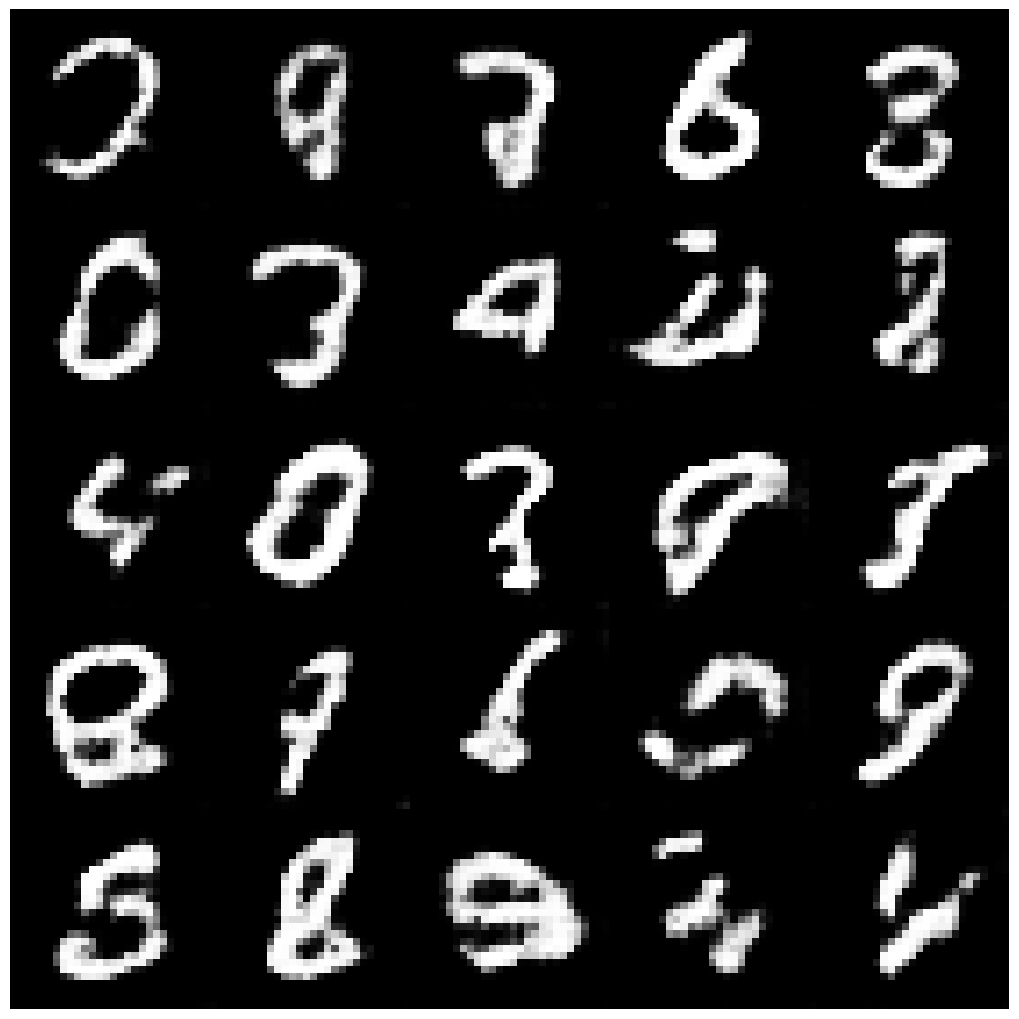

In [ ]:
# show results with normal sampler
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(gen_data[i*5 +j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

In [ ]:
from pythae.samplers import GaussianMixtureSampler, GaussianMixtureSamplerConfig

In [ ]:
# set up gmm sampler config
gmm_sampler_config = GaussianMixtureSamplerConfig(
    n_components=10
)

# create gmm sampler
gmm_sampler = GaussianMixtureSampler(
    sampler_config=gmm_sampler_config,
    model=trained_model
)

# fit the sampler
gmm_sampler.fit(train_dataset)

In [ ]:
# sample
gen_data = gmm_sampler.sample(
    num_samples=25
)

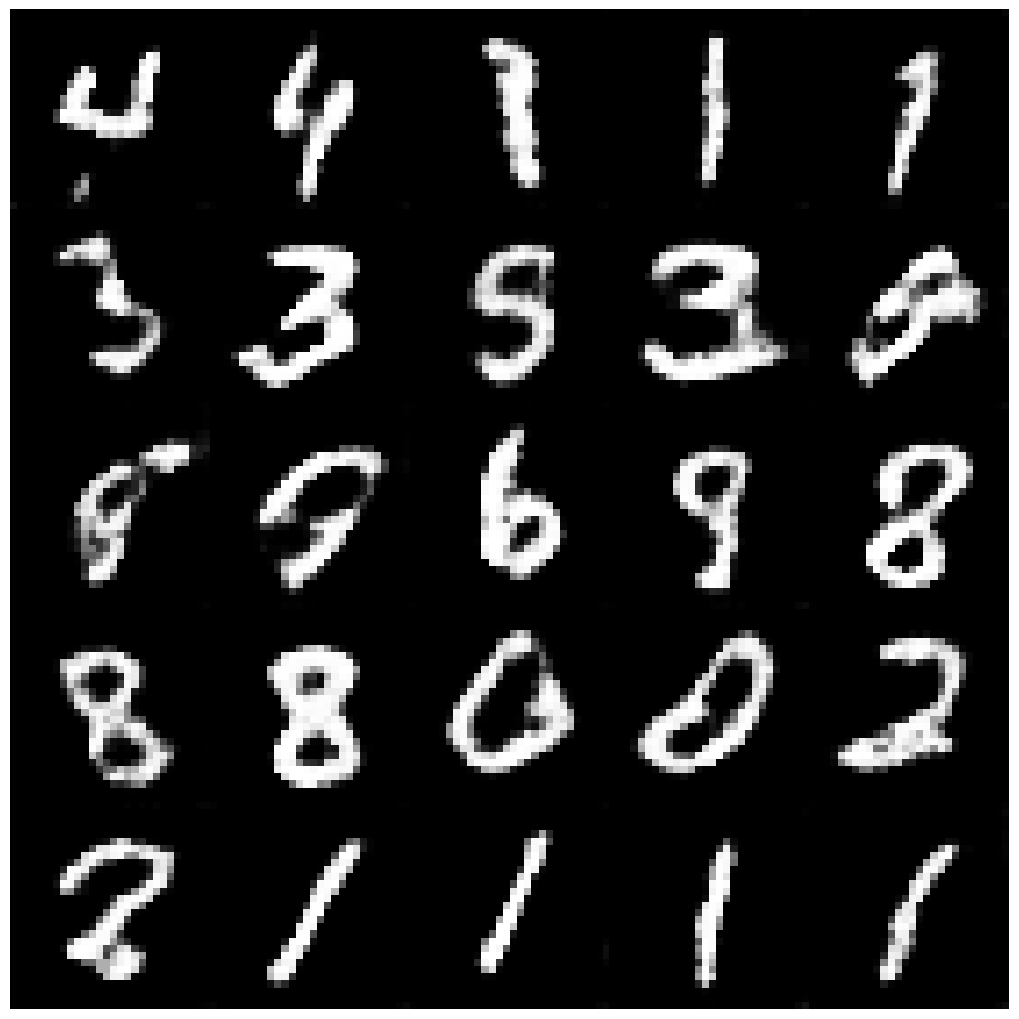

In [ ]:
# show results with gmm sampler
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(gen_data[i*5 +j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

## ... the other samplers work the same

## Visualizing reconstructions

In [ ]:
reconstructions = trained_model.reconstruct(eval_dataset[:25].to(device)).detach().cpu()

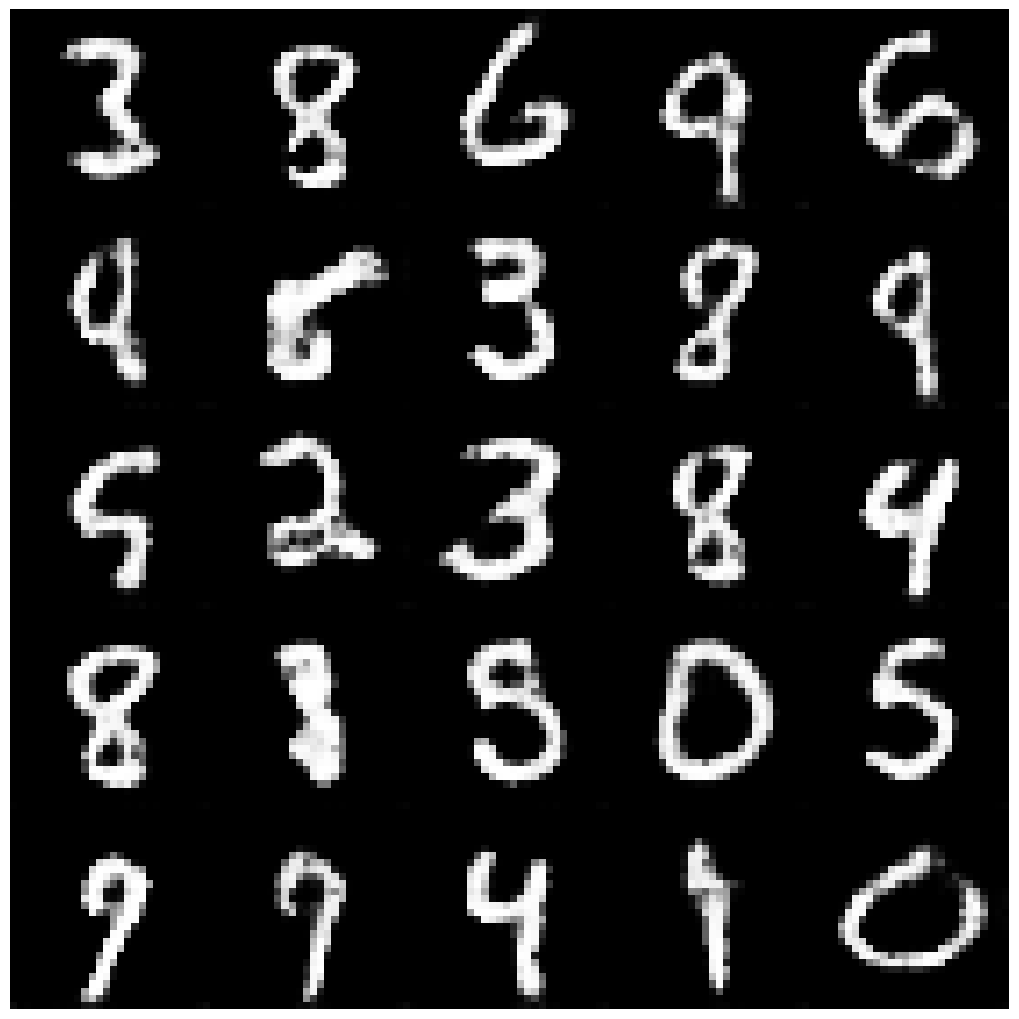

In [ ]:
# show reconstructions
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(reconstructions[i*5 + j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

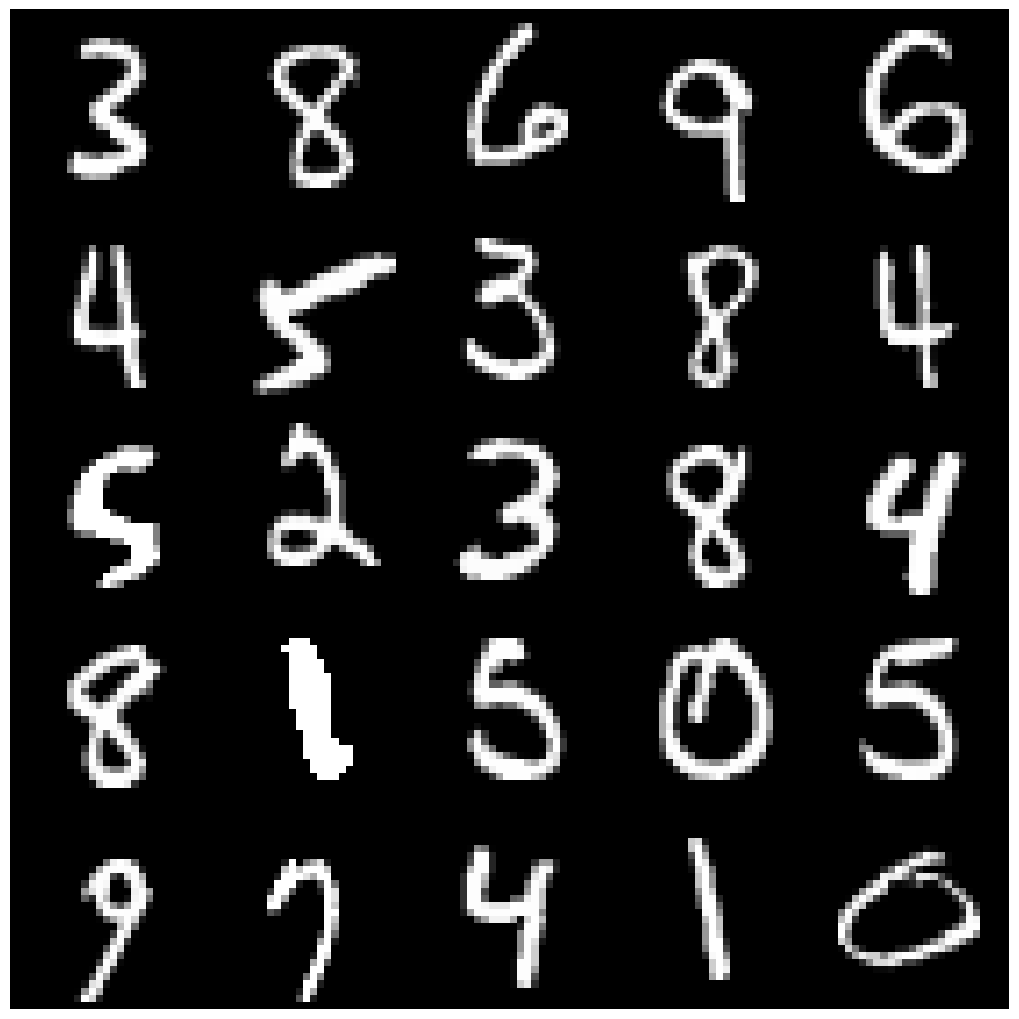

In [ ]:
# show the true data
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(eval_dataset[i*5 +j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

In [ ]:
from torch import nn
loss = nn.MSELoss()
recon = trained_model.reconstruct(eval_dataset.to(device)).detach().cpu()
mse = loss(eval_dataset,recon)
print(mse.item())

0.030433908104896545


## Visualizing interpolations

In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
interpolations = trained_model.interpolate(eval_dataset[:5].to(device), eval_dataset[5:10].to(device), granularity=10).detach().cpu()

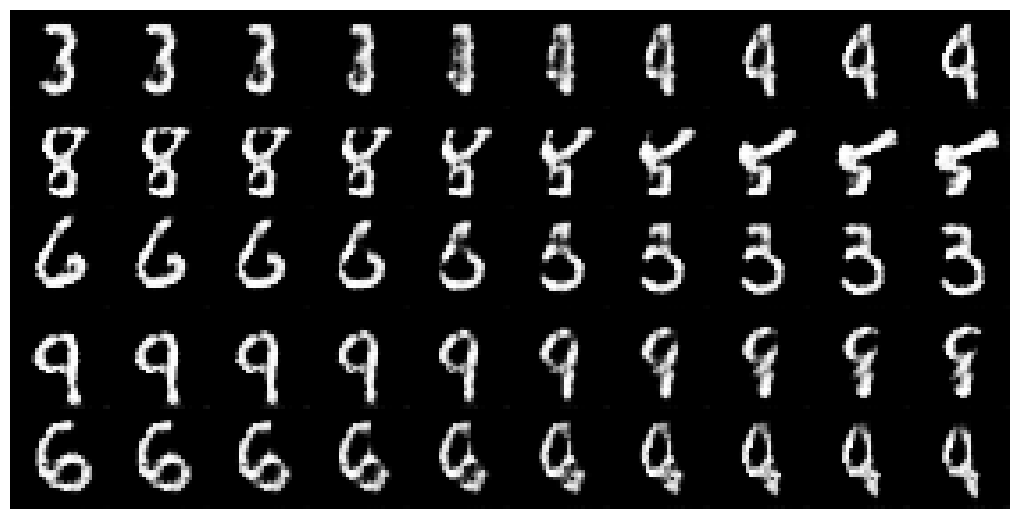

In [ ]:
# show interpolations
fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(10, 5))

for i in range(5):
    for j in range(10):
        axes[i][j].imshow(interpolations[i, j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)